In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import operator
import math



from matplotlib import patches
from spectral import imshow as spyShow
from spectral import spy_colors

In [2]:
img = io.imread(r'C:\Users\dhart\Desktop\mas\137_0137ML0818056000E1_DXXX.jpg')          
print("Shape of image : ",format(np.shape(img)))
print("Maximum pixel value : ",format(np.max(img)))
print("minimum pixel value : ",format(np.min(img)))

Shape of image :  (500, 560, 3)
Maximum pixel value :  255
minimum pixel value :  0


In [3]:
A = img.flatten()
np.shape(A)
#A

(840000,)

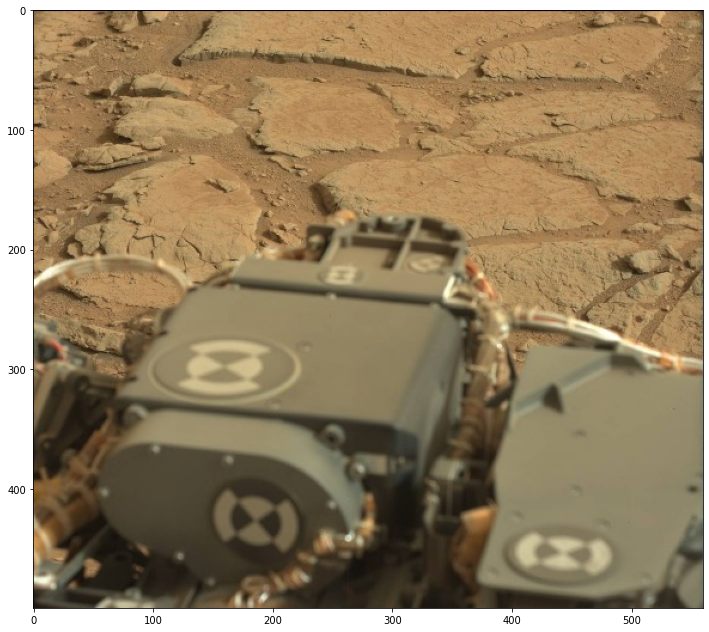

In [4]:
plt.figure(figsize=(20,11))
plt.imshow(img)

In [5]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

In [6]:
def count_pixel(arr,R,flag,bit):
    r = bit//R
    out_ = []                                         ######final function
    x = []
    y = []
    temp = 0
    for i in range(0,R):
        for j in range(i*r,(i+1)*r+1):
            temp = (arr == j).sum()             
            out_.append(temp)
        x.append(np.argmax(out_))
        y.append(np.max(out_))
        out_.clear()
    return np.array(x)+np.arange(0,bit,r) ,y, flag*np.ones((np.shape(x)))
        

In [7]:
def merge_pix(arr1,arr2,arr3):                                     ###final function
    merged = np.concatenate((arr1,arr2,arr3),axis = None)
    return merged

In [8]:
R,r,rf = count_pixel(R.flatten(),5,0,255)
G,g,gf = count_pixel(G.flatten(),5,1,255)
B,b,bf = count_pixel(B.flatten(),5,2,255)

X = merge_pix(R,G,B)
Y = merge_pix(r,g,b)
fLAG = merge_pix(rf,gf,bf)

In [9]:
X

array([ 50,  79, 150, 153, 204,  44,  71, 138, 153, 255,  51, 101, 107,
       156, 207], dtype=int64)

In [10]:
Y

array([1154, 1915, 5886, 4057,  369, 1164, 2399, 6660, 3116,   39, 2210,
       6092, 9025,  124,   18])

In [11]:
fLAG

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.])

In [12]:
L = sorted(zip(X,Y,fLAG), key=operator.itemgetter(1))       
new_x, new_y,new_f = zip(*L)

In [13]:
new_x

(207, 255, 156, 204, 50, 44, 79, 51, 71, 153, 153, 150, 101, 138, 107)

In [14]:
new_y

(18,
 39,
 124,
 369,
 1154,
 1164,
 1915,
 2210,
 2399,
 3116,
 4057,
 5886,
 6092,
 6660,
 9025)

In [15]:
new_f

(2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 2.0)

In [16]:
def locate(arr,element):
    stash = []
    for i in range(len(arr)):
        if arr[i] == element:
            stash.append(i)
    return stash



def take_mean(arr,locs):
    sum_ = 0
    for i in locs:
        sum_ += arr[i]
    return sum_//len(locs)

In [17]:
def step_iforget(img,flag,x,y,n):           #n = no. of centroids
    new_flag = flag[-n:]
    new_x_ = x[-n:]
    new_y_ = y[-n:]
    means_ = []
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    for i in range(n):
        if new_flag[i] == 0:
            stash_ = locate(R.flatten(),new_x_[i])
            R_mean = new_x_[i]
            G_mean = take_mean(G.flatten(),stash_)
            B_mean = take_mean(B.flatten(),stash_)
        elif new_flag[i] == 1:
            stash_ = locate(G.flatten(),new_x_[i])
            R_mean = take_mean(R.flatten(),stash_)
            G_mean = new_x_[i]
            B_mean = take_mean(B.flatten(),stash_)
        elif new_flag[i] == 2:
            stash_ = locate(B.flatten(),new_x_[i])
            R_mean = take_mean(R.flatten(),stash_)
            G_mean = take_mean(G.flatten(),stash_)
            B_mean = new_x_[i]
            
        means_.append((R_mean,G_mean,B_mean))
            
    return means_

In [18]:
MyValues = step_iforget(img,new_f,new_x,new_y,5)

In [19]:
MyValues

[(153, 133, 95),
 (150, 133, 98),
 (170, 143, 101),
 (158, 138, 100),
 (160, 143, 107)]

In [20]:
def euclidean(meanTup,x,y,z):
    return ((meanTup[0]-x)**2+(meanTup[1]-y)**2+(meanTup[2]-z)**2)**0.5

In [2]:
my_list = [15,6,22,10]
for value in set(my_list) - {15}:
    print(value)

10
22
6


def can(meanTup,x,y,z):
  return np.sum(np.mod(meantup[0]-x)/(meantup[0]+x),np.mod(meantup[1]-y)/(meantup[1]+y),np.mod(meantup[2]-z)/(meantup[2]+z))

In [ ]:
def Can(meanTup,x,y,z): 
  return np.sum(np.mod(meantup[0]-x)/(meantup[0]+x),np.mod(meantup[1]-y)/(meantup[1]+y),np.mod(meantup[2]-z)/(meantup[2]+z))

In [ ]:
def RMS(meanTup,x,y,z): 
  return np.sqrt(np.sum((meantup[0]-x)**2,(meantup[1]-y)**2,(meantup[2]-z)**2)/3)

In [ ]:
def ChiS1(meanTup,x,y,z): 
  return np.sum((meantup[0]-x)**2/(meantup[0]+x)**2,(meantup[1]-y)**2/(meantup[1]+y)**2,(meantup[2]-z)**2/(meantup[2]+z)**2)

def RMS(meanTup,x,y,z):
  return np.sqrt(np.sum((meantup[0]-x)**2,(meantup[1]-y)**2,(meantup[2]-z)**2)/3)

def ChiS1(meanTup,x,y,z):
  return np.sum((meantup[0]-x)**2/(meantup[0]+x)**2,(meantup[1]-y)**2/(meantup[1]+y)**2,(meantup[2]-z)**2/(meantup[2]+z)**2)

In [ ]:
def ChiS2(meanTup,x,y,z): 
  return np.sum((meantup[0]-x)**2/(meantup[0]+x),(meantup[1]-y)**2/(meantup[1]+y),(meantup[2]-z)**2/(meantup[2]+z))

In [ ]:
def CosM(meanTup,x,y,z):
  return 1-((np.sum(meantup[0],meantup[1],meantup[2])*np.sum(x,y,z))/(np.sum(meantup[0]**2,meantup[1]**2,meantup[2]**2)*np.sum(x**2,y**2,z**2)))

In [ ]:
def GeMC(meanTup,x,y,z):
  return np.sum((meanTup[0]-x)**2/(1+(meanTup[0]-x)**2),(meanTup[1]-y)**2/(1+(meanTup[1]-y)**2),(meanTup[2]-z)**2/(1+(meanTup[2]-z)**2))

def SAM(meanTup,x,y,z):
  return np.acos((np.sum(meantup[0],meantup[1],meantup[2])*np.sum(x,y,z))/(np.sum(meantup[0]**2,meantup[1]**2,meantup[2]**2)*np.sum(x**2,y**2,z**2)))

In [21]:
def cluster_mat(img,mean):
    stash = []
    h,w = img.shape[0],img.shape[1]
    mask_ = np.ones((h,w))
    for i in range(h):
        for j in range(w):
            for means_ in mean:
                stash.append(euclidean(means_,img[:,:,0][i][j],img[:,:,1][i][j],img[:,:,2][i][j])) #change here for different distance measures
            mask_[i][j] = mask_[i][j]*np.argmin(stash)
            stash.clear()
    return mask_


In [22]:
Mask_in = cluster_mat(img,MyValues)

In [23]:
Mask_in

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [24]:
np.unique(Mask_in)

array([0., 1., 2., 3., 4.])

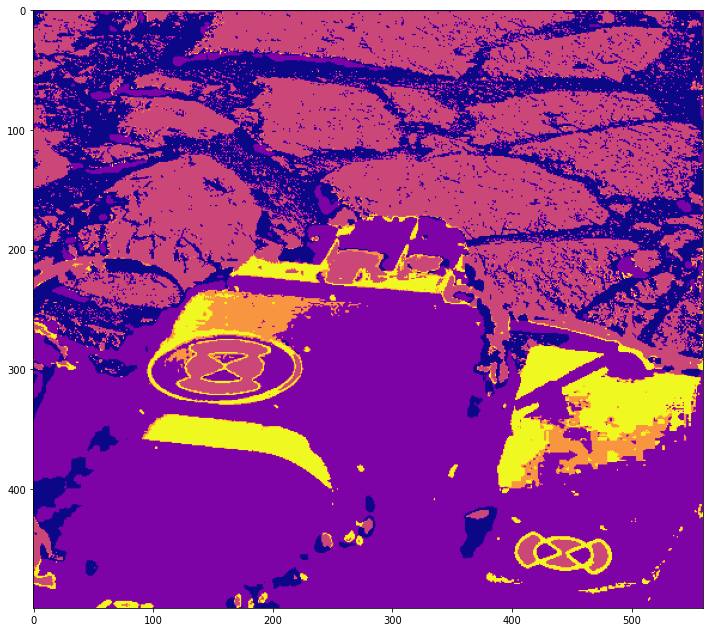

In [25]:
plt.figure(figsize=(20,11))
#plt.imsave(r'C:\Users\dhart\Desktop\map.png',Mask)
plt.imshow(Mask_in,cmap = 'plasma')

### plt.hist(Mask.flatten(),5,range=(0,5),fc='red',ec='red',label='euclid')
#plt.hist(img2[:,:,0].flatten(),256,range=(0,255),fc='green',ec='green',label='cheby')

In [26]:
def mat_locate(mat,element):
    stash = []
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if mat[i][j] == element:
                stash.append((i,j))
    return stash

def mat_mean(mat,locs):
    value_ = 0
    for tups in locs:
            value_ += mat[tups[0]][tups[1]]
    return value_//len(locs)



def norm(tup,tups):
    return (np.absolute(tup[0]-tups[0])+np.absolute(tup[1]-tups[1])+np.absolute(tup[2]-tups[2]))

In [27]:
def learning(mask,img,initial_centers,epochs,epsilon):
    for i in range(epochs):
        msk_ind = np.unique(mask)
        stash = []
        new_cent = []
        error_ = 0
        final_centroids = []
        r_mean = 0
        g_mean = 0
        b_mean = 0
        for j in msk_ind:
            stash = mat_locate(mask,j)
            r_mean = mat_mean(img[:,:,0],stash)
            g_mean = mat_mean(img[:,:,1],stash)
            b_mean = mat_mean(img[:,:,2],stash)
            new_cent.append((r_mean,g_mean,b_mean))
            stash.clear()
            
            
            
        for tups,tups_ in zip(initial_centers,new_cent):
            error_ += norm(tups,tups_)
        if error_< epsilon:
            final_centroids = new_cent.copy()
            #error_ = 0
            break
        elif error_>epsilon:
            initial_centers = new_cent.copy()
            mask = cluster_mat(img,initial_centers)
            new_cent.clear()
            #error_ = 0
            
        print("epoch {}/{}---------------------------------------> Error : {} ".format(i+1,epochs,error_))    
        
        
    return mask,final_centroids
            
        
            
            
            
            
            
        
        

    
    
        
        
        
        
    
    
    
    
    
    
    

In [28]:
Mask1,finalC = learning(Mask_in,img,MyValues,20,0.5)

epoch 1/20---------------------------------------> Error : 227 
epoch 2/20---------------------------------------> Error : 101 
epoch 3/20---------------------------------------> Error : 42 
epoch 4/20---------------------------------------> Error : 38 
epoch 5/20---------------------------------------> Error : 27 
epoch 6/20---------------------------------------> Error : 19 
epoch 7/20---------------------------------------> Error : 13 
epoch 8/20---------------------------------------> Error : 10 
epoch 9/20---------------------------------------> Error : 8 
epoch 10/20---------------------------------------> Error : 5 
epoch 11/20---------------------------------------> Error : 7 
epoch 12/20---------------------------------------> Error : 9 
epoch 13/20---------------------------------------> Error : 12 
epoch 14/20---------------------------------------> Error : 11 
epoch 15/20---------------------------------------> Error : 13 
epoch 16/20--------------------------------------->

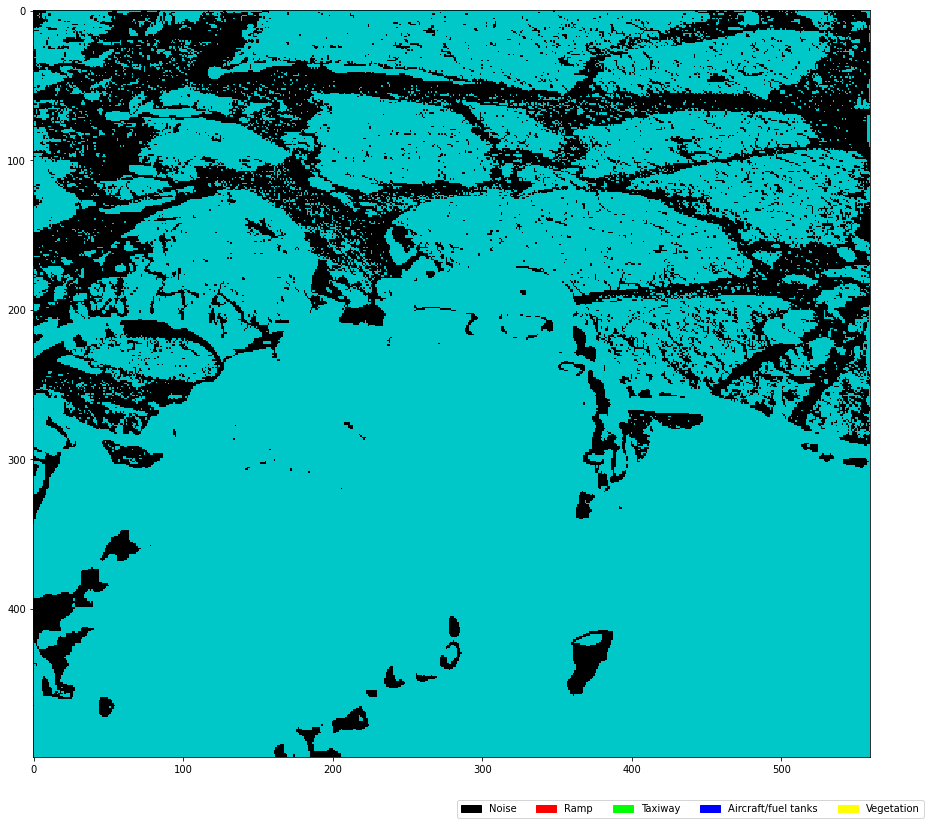

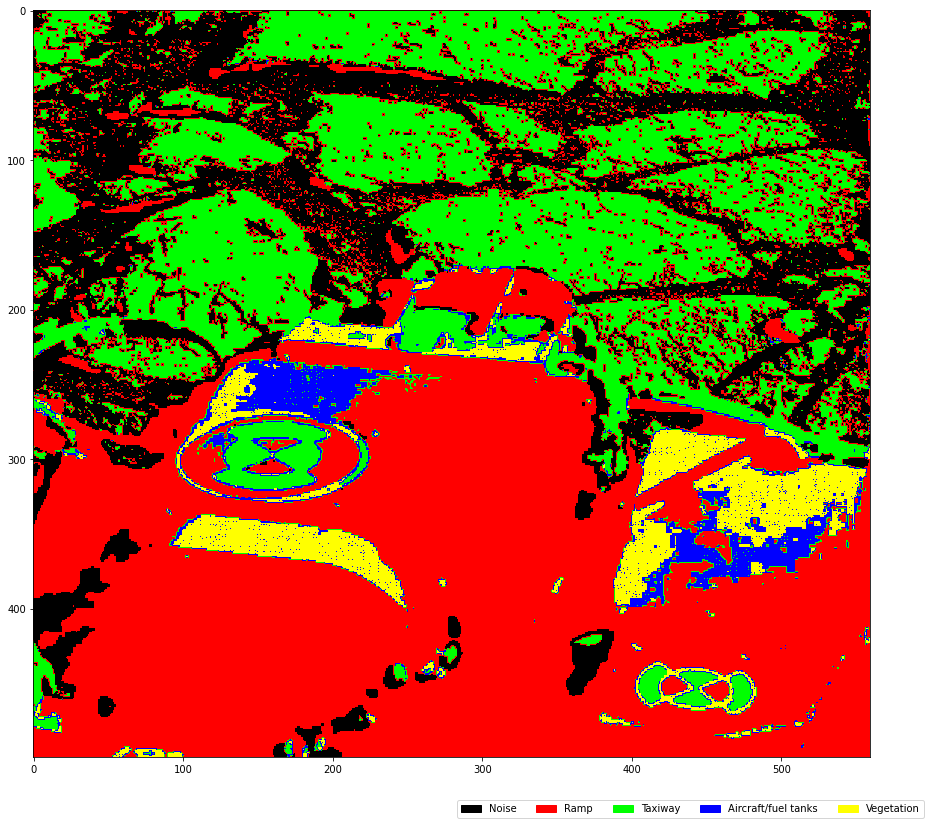

In [37]:
imageView = spyShow(classes=Mask_in, fignum=1 ,figsize =(15,15), interpolation='none')
    # imageView.set_display_mode('overlay')

labelDictionary={0:'Noise', 1:'Ramp', 2:'Taxiway', 3:'Aircraft/fuel tanks', 4:'Vegetation'}
labelPatches = [ patches.Patch(color=spy_colors[int(x)]/255.,
                     label=labelDictionary[int(x)]) for x in np.unique(Mask1) ]
#"""
plt.legend(handles=labelPatches, ncol=5, fontsize='medium', 
               loc='upper left',bbox_to_anchor=(0.5, -0.05))
    
predict_image = spyShow(classes = Mask_in.astype(int),figsize =(15,15))
plt.legend(handles=labelPatches, ncol=5, fontsize='medium', 
               loc='upper left',bbox_to_anchor=(0.5, -0.05))
               
#"""

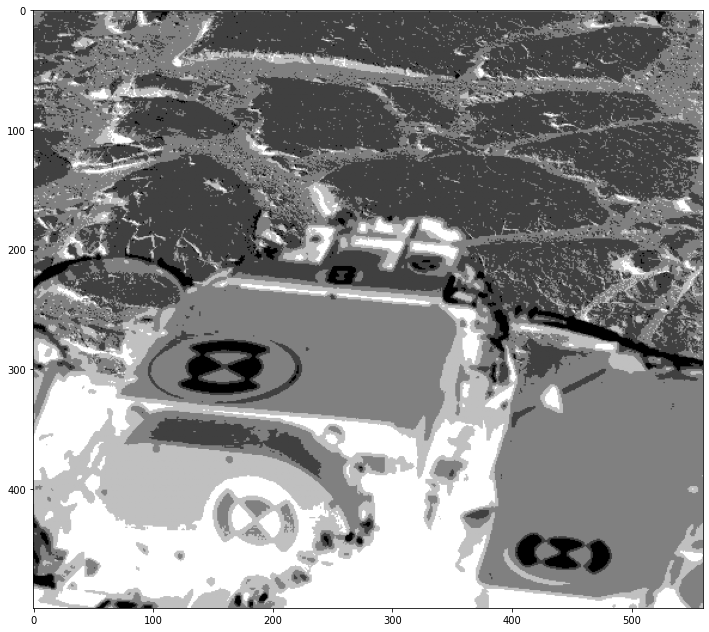

In [33]:
plt.figure(figsize=(20,11))
#plt.imsave(r'C:\Users\dhart\Desktop\trained1_k5_n10_eps5.jpeg',Mask1)
plt.imshow(Mask1,cmap = 'gray')


In [34]:
finalC

[]

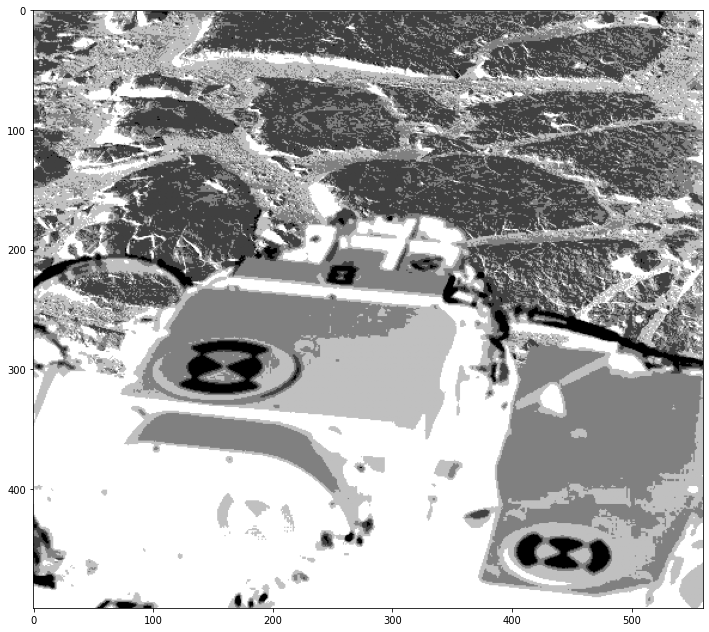

In [35]:
plt.figure(figsize=(20,11))
#plt.imsave(r'C:\Users\dhart\Desktop\trained1.jpeg',Mask_in)
plt.imshow(Mask_in,cmap = 'gray')


In [ ]:
c = a.copy()

In [57]:
IM = plt.imread(r'C:\Users\dhart\Desktop\airport.jpeg')
IM.shape

(428, 760, 3)

In [37]:
x = img.reshape(-1,3)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit(x)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(img.shape)

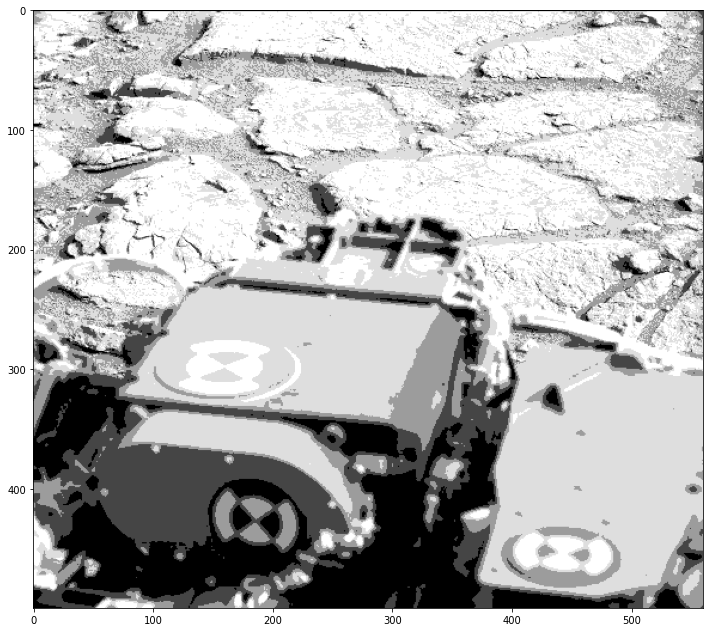

In [38]:
plt.figure(figsize=(20,11))
#plt.imsave(r'C:\Users\dhart\Desktop\trained1.jpeg',Mask_in)
plt.imshow(segmented_image[:,:,2],cmap = 'gray')

In [61]:
segmented_image.shape

(428, 760, 3)

In [60]:
np.unique(segmented_image)

array([ 40.30792414,  54.3639859 ,  61.34457105,  64.69623474,
        80.64551357,  89.87954136,  99.34578511, 122.3568455 ,
       128.73370294, 136.42937979, 154.86929251, 169.76787753,
       230.83448879, 239.64340042, 241.8668641 ])

## Adjusting K

In [30]:
def TupSum(ch1,ch2):
    arr = np.zeros((256,256))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            s= np.argwhere(i==ch1)
            t = np.argwhere(ch2==j)
            arr[i][j]= s.shape[0]+t.shape[1]
    return arr